In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [2]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [3]:
ref = []
lens = []
for split_num in range(20):
    num = "0"*(2-len(str(split_num))) + str(split_num)
    ref.append(
        pickle_load(f'Data\\Split_Data\\Reflectance\\reflectance_{num}.pkl')
    )
    lens.append(ref[-1].shape[0])
ref = np.concatenate(ref, axis=0)
centers = ref.mean(axis=0)
pickle_save(centers, 'Data\\Split_Data\\Full_PCA\\channel_centers.pkl')

In [4]:
pca = PCA(n_components=ref.shape[1], whiten=True)
ref_pca = pca.fit_transform(ref)
pickle_save(pca, 'Data\\Split_Data\\Full_PCA\\pca_object.pkl')

In [5]:
saved = 0
path_template = 'Data\\Split_Data\\Full_PCA\\reflectance_(**).pkl'
for split_num, length in enumerate(lens):
    pickle_save(
        ref_pca[saved:saved + length, :],
        path_template.replace(
            '(**)', "0"*(2-len(str(split_num))) + str(split_num)
        )
    )
    saved += length

# Kernel PCA

In [44]:
kpca = KernelPCA(n_components=ref.shape[1], kernel='sigmoid')
ref_kpca = pca.fit_transform(ref)
pickle_save(kpca, 'Data\\Split_Data\\KPCA\\Sigmoid\\pca_object.pkl')

saved = 0
path_template = 'Data\\Split_Data\\KPCA\\Sigmoid\\reflectance_(**).pkl'
for split_num, length in enumerate(lens):
    pickle_save(
        ref_pca[saved:saved + length, :8],
        path_template.replace(
            '(**)', "0"*(2-len(str(split_num))) + str(split_num)
        )
    )
    saved += length

In [ ]:
kpca = KernelPCA(n_components=ref.shape[1], kernel='cosine')
ref_kpca = pca.fit_transform(ref)
pickle_save(kpca, 'Data\\Split_Data\\KPCA\\Cosine\\pca_object.pkl')

saved = 0
path_template = 'Data\\Split_Data\\KPCA\\Cosine\\reflectance_(**).pkl'
for split_num, length in enumerate(lens):
    pickle_save(
        ref_pca[saved:saved + length, :8],
        path_template.replace(
            '(**)', "0"*(2-len(str(split_num))) + str(split_num)
        )
    )
    saved += length

In [ ]:
kpca = KernelPCA(n_components=ref.shape[1], kernel='poly', degree=2)
ref_kpca = pca.fit_transform(ref)
pickle_save(kpca, 'Data\\Split_Data\\KPCA\\Poly2\\pca_object.pkl')

saved = 0
path_template = 'Data\\Split_Data\\KPCA\\Poly2\\reflectance_(**).pkl'
for split_num, length in enumerate(lens):
    pickle_save(
        ref_pca[saved:saved + length, :8],
        path_template.replace(
            '(**)', "0"*(2-len(str(split_num))) + str(split_num)
        )
    )
    saved += length

In [ ]:
kpca = KernelPCA(n_components=ref.shape[1], kernel='poly', degree=3)
ref_kpca = pca.fit_transform(ref)
pickle_save(kpca, 'Data\\Split_Data\\KPCA\\Poly3\\pca_object.pkl')

saved = 0
path_template = 'Data\\Split_Data\\KPCA\\Poly3\\reflectance_(**).pkl'
for split_num, length in enumerate(lens):
    pickle_save(
        ref_pca[saved:saved + length, :8],
        path_template.replace(
            '(**)', "0"*(2-len(str(split_num))) + str(split_num)
        )
    )
    saved += length

# Visualization

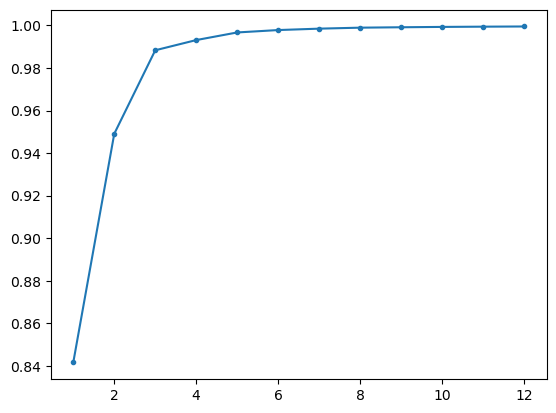

In [5]:
plt.plot(
    [i for i in range(1,len(pca.explained_variance_ratio_) + 1)][:12],
    [sum(pca.explained_variance_ratio_[:i])
    for i in range(1,len(pca.explained_variance_ratio_) + 1)
    ][:12],
    marker='.'
)

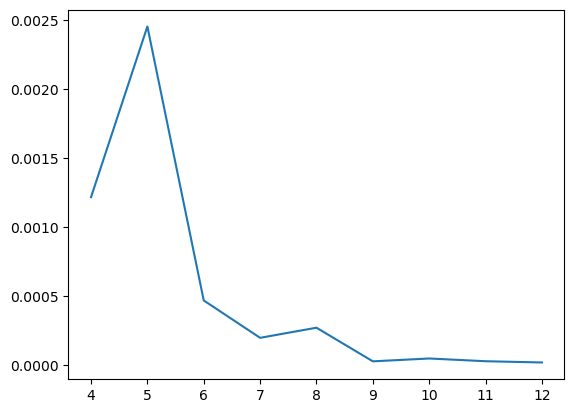

In [38]:
plt.plot(np.arange(4,13),
    (
        np.array(
            [
                pca.explained_variance_ratio_[i]
                for i in range(0,len(pca.explained_variance_ratio_))
            ]
        )[:-1]
        - np.array(
            [
                pca.explained_variance_ratio_[i]
                for i in range(1,len(pca.explained_variance_ratio_))
            ]
        )
    )[3:12]
)

In [32]:
[
    (
        i,
        sum(pca.explained_variance_ratio_[:i])
    )
        for i in range(1,len(pca.explained_variance_ratio_) + 1)
]

[(1, 0.8415589069233856),
 (2, 0.949069925405491),
 (3, 0.9883269125369796),
 (4, 0.9931255393800081),
 (5, 0.9967073398556665),
 (6, 0.9978349130957934),
 (7, 0.9984940750581786),
 (8, 0.9989557747474501),
 (9, 0.9991466401973589),
 (10, 0.9993104964158555),
 (11, 0.999426661561697),
 (12, 0.9995149681988845),
 (13, 0.999584494887079),
 (14, 0.9996410302832327),
 (15, 0.9996913493277185),
 (16, 0.9997400106477188),
 (17, 0.9997777542661808),
 (18, 0.9998071001252947),
 (19, 0.9998290505214986),
 (20, 0.9998491377613535),
 (21, 0.999865220573535),
 (22, 0.9998779197022643),
 (23, 0.9998893126654694),
 (24, 0.9998985738627548),
 (25, 0.9999063079422523),
 (26, 0.9999134272647137),
 (27, 0.9999202116336937),
 (28, 0.9999253918321568),
 (29, 0.9999302785035239),
 (30, 0.9999346304132319),
 (31, 0.9999384384936331),
 (32, 0.9999418284496168),
 (33, 0.9999451970618646),
 (34, 0.9999479720732827),
 (35, 0.9999507308896155),
 (36, 0.9999533091479463),
 (37, 0.9999556497669446),
 (38, 0.999957